# Homework 3: Implementation of a classifier perceptron for binary classification  
## Universidad de Monterrey  
### School of Engineering and Technologies  

**Virgilio Del Bosque Luna 578255 | Ingeniería en Mecatrónica**  
**Course:** Artificial Intelligence II  
**Lecturer:** Dr. Andrés Hernández Gutiérrez  
**Due date:** Thursday 19 August 2023, before midnight


San Pedro Garza García, Nuevo León  
*"Doy mi palabra de que he realizado esta actividad con integridad académica"*

### 1. Import standard libraries

Se instala la librería ucimlrepo.

Se importan las librerías necesarias para el desarrollo del programa.

In [2]:
#!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo #Permite el acceso al dataset desde UCI.
import pandas as pd #Permite la manipulación y análisis de datos.
import plotly.express as px #Creación de gráficos interactivos.
import seaborn as sns #Genera gráficos estadísticos.
import matplotlib.pyplot as plt #Permite generar gráficos.
import numpy as np #Permite la creación de vectores, matrices multidimensionales y funciones matemáticas de alto nivel.
import tensorflow as tf #Facilita la creación de modelos de aprendizaje automático. 
from sklearn.model_selection import train_test_split #División de datos en entrenamiento y prueba.
from sklearn.preprocessing import StandardScaler #Estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.
#Normalización de datos.
from sklearn.metrics import ConfusionMatrixDisplay #Permite visualizar la matriz de confusión
from sklearn.metrics import confusion_matrix #Permite el uso de la matriz de confusión.


La salida de la celda es de la línea de"!pip install ucimlrepo" y lo que se ve son las cargas de la instalación de la librería junto con sus versiones.


### 2. Download the ```occupancy-detection``` dataset

For further information regarding this dataset, visit the UC Irving Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/357/occupancy+detection).

Se descarga el dataset "occupancy-detection" y extraen los datos.

In [3]:
# Download `occupancy-detection` dataset
# using the id=357
occupancy_detection = fetch_ucirepo(id=357) #Se descarga el conjunto de datos desde el repositorio UCI.

# Build the feature and the target data sets
data = occupancy_detection.data.original #Extracción de los datos originales del conjunto de datos que se descargó.

No hay salida de esta celda, únicamente se cargan los datos.

### 3. Perform an exploratory data analysis

Se arreglan los datos para usar en el modelo.

In [4]:
df = data.drop(['date', 'id'], axis=1) #Se eliminan las columnas "date" y "id" esto porque no sirven para el modelo.
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce') #Se asegura que todas las columnas sean numéricas.
#"coerce" se refiere a "entonces el análisis no válido se establecerá como NaN"(GeeksforGeeks, 2018)
df = df.dropna() #Se eliminan las filas con los valores nulos.


No hay salida de esta celda, únicamente se preparan/eliminan los datos.

#### 3a. Print some samples of the ```features``` and the ```target``` variables

Se despliega el DataFrame previamente preparado en la celda anterior.

In [5]:
df #Desplegar el DataFrame.

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


La salida son los datos los cuales se descargaron, pero se excluyen  los valores de las columnas de "date" e "id" previamente redefinidos.

Los datos incluyen 20560 filas y 6 columnas:
- Temperatura (Celsius)
- Humedad (%)
- Luz (LUX)
- CO2 (ppm)
- Radio de humedad (Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air)
- ocupación (Occupancy, 1 occupied, 0 not occupied)

#### 3b. Obtain statistics about the ```features``` and the ```target``` variables

Se muestran especificaciones de la base de datos tales como la media, desviación estándar, valores mínimos y máximos, entre otros.

In [6]:
df.describe() #Muestra las especificaciones a detalle del DataFrame.

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Como salida se obtienen las estadística a detalle del DataFrame donde se puede observar las siguientes estadística: 

- Count (Filas)
- Mean (Media)
- STD (Desviación estándar)
- Min (Mínimos)
- 25% (Porcentajes)
- 50%
- 75%
- Max (Máximos)

#### 3c. Visualise a scatter matrix plot using ```plotly``` to visualise the relationships between features

Creación de matriz de dispersión para poder visualizar la relación existente entre las variables. (Se ponen de colores)

In [7]:
# Scatter plot matrix
features = df.drop(["Occupancy"], axis=1).columns #Selección de las características.
fig = px.scatter_matrix(data_frame=df,
                        dimensions=features,
                        color=df['Occupancy'])
#Dimensiones del gráfico y color dependiendo de la ocupación (1 o 0).

fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False) #Configuración de detalles del gráfico.
fig.update_layout(width=900, height=600, title="Occupancy Detection", font_size=9) #Ajuste de tamaño y título.
fig.show() #Desplegar gráfico.

c:\Users\vicod\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


La salida es un gráfico dentro del cual hay más gráficos, los cuales, son interactivos, lo que significa que al momento de pasar el cursor por arriba de una de las gráficas mostradas, podremos obtener las mediciones de ese respectivo gráfico, ya sea de temperatura vs. humedad, temperatura vs. Co2, Light vs. Co2.

Esto nos permite distinguir entre las ocupaciones, como visualizar la métrica exacta de cada punto.

#### 3d. Visualise a pair plot to using ```seaborn``` to capture the relatioshops between features

Creación de gráficos con sus pares para mostrar la relacion entre todas las características del modelo, distinguidas con base en la ocupación (1 o 0) razón por la cual se usan 2 colores.

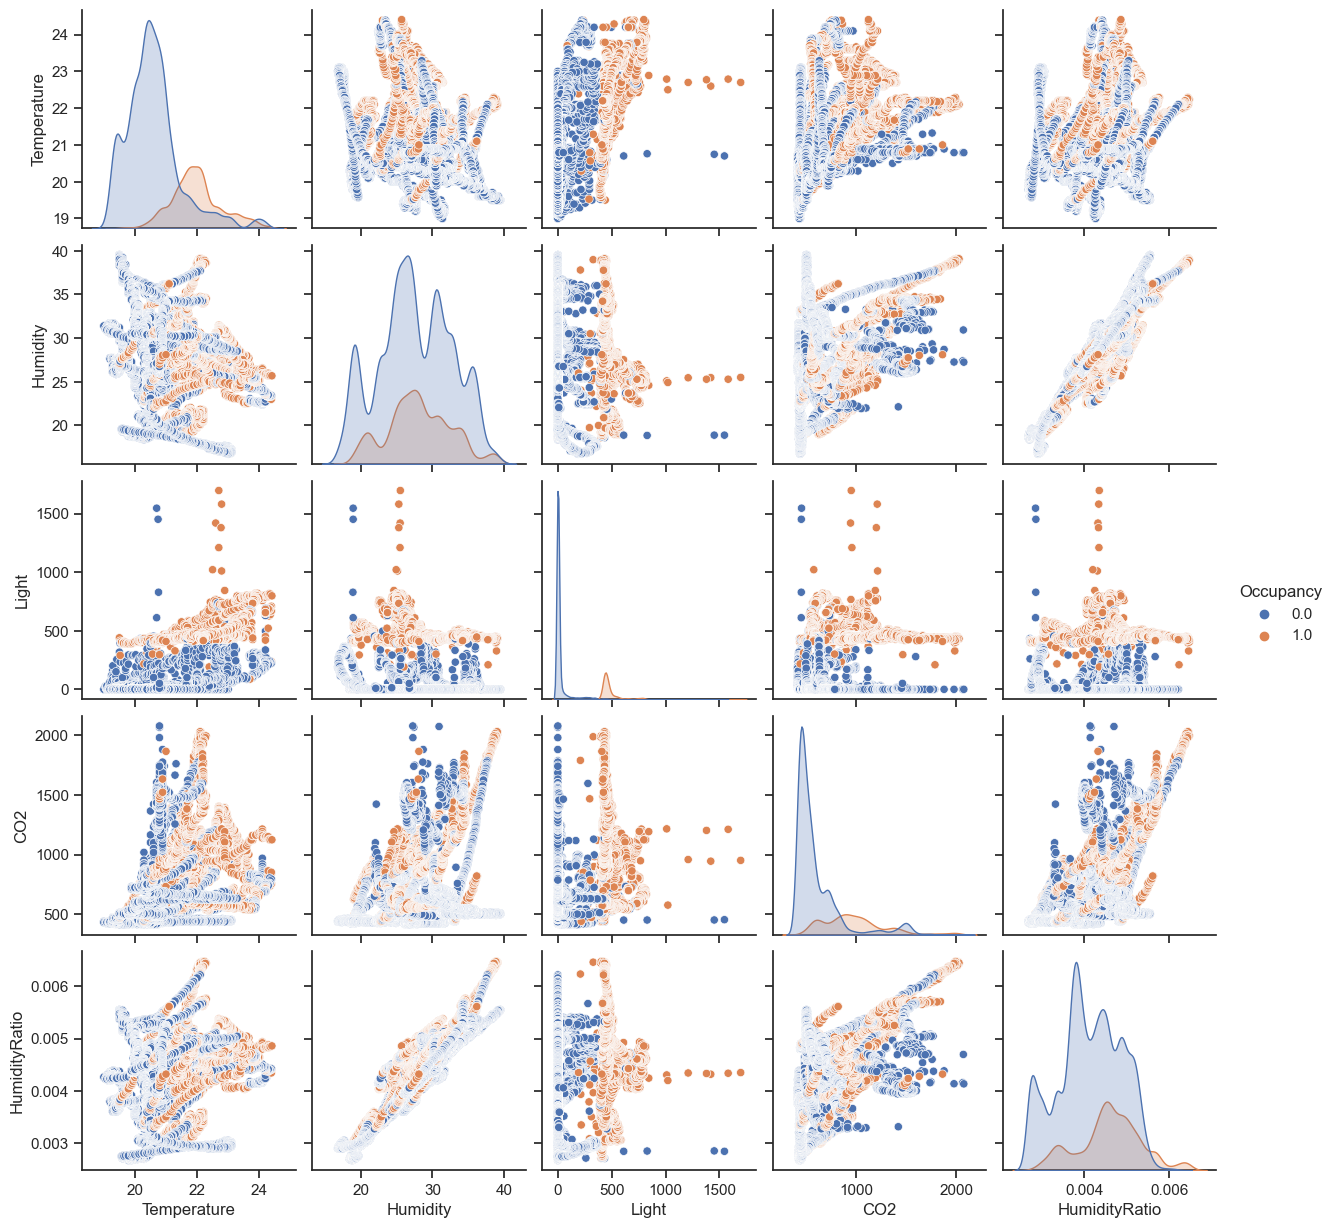

In [8]:
sns.set_theme(style="ticks") #Selección de estilo del gráfico.
sns.pairplot(df, hue="Occupancy"); #Creación del gráfico de pares con seaborn.

La salida de la celda anterior es un gráfico donde se puede apreciar los gráficos de dispersión y las distribuciones, donde en la diagonal se puede apreciar el mismo estilo de gráfico.


Esto nos sirve para poder dimensionar la distribución de los datos referente a los datos mismos. (Comparación)

#### 3e. Visualise the histogram of classes

Se crea un histograma para visualizar la frecuencia de cada clase referente a la ocupación (Occupancy 1 o 0).

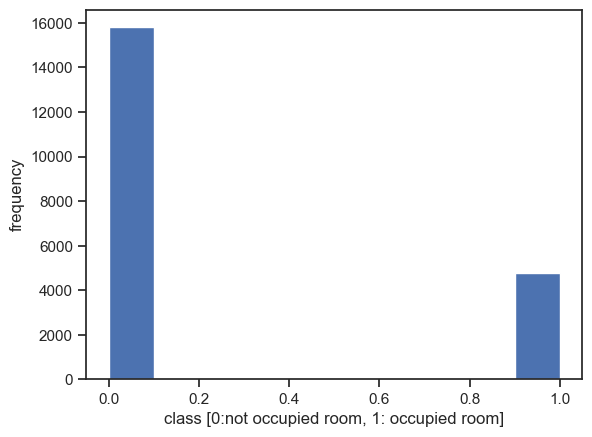

In [9]:
plt.hist(df['Occupancy']); #Creación del histograma de "Occupancy".
plt.xlabel('class [0:not occupied room, 1: occupied room]') #Etiqueta del eje x.
plt.ylabel('frequency'); #Etiqueta del eje y.

Se puede apreciar claramente la frecuencia de cada clase de las ocupaciones siendo la ocupación 0 con más frecuencia y la ocupación de 1 con la menor frecuencia lo que nos puede ayudar a la toma de decisiones o identificación de patrones.


### 4. Training and evaluate your model

#### 4a. For reproducibility purposes only, set a particular seed number

np.random implementa números aleatorios con la capacidad de extraer muestras de una variedad de distribuciones de probabilidad. La **"seed"** se refiere a números enteros positivos grandes donde se recomienda utilizar números únicos y grandes para garantizar que la semilla sea diferente a la de cualquier otra persona. "This is good practice to ensure that your results are statistically independent from theirs unless you are intentionally trying to reproduce their result. A convenient way to get such a seed number is to use secrets.randbits to get an arbitrary 128-bit integer"(Random Sampling (numpy.random) — NumPy v2.1 Manual, n.d.).

In [10]:
# Set a global seed for reproducibility
tf.random.set_seed(4500) #Se fija la semilla para su reproducibilidad.

Esta celda de código no produce ninguna salida.

#### 4b. Build your feature and target sets

Se dividen los datos en "x", "y" esto para seguir con el modelo de aprendizaje automático.

In [11]:
X = df.drop(["Occupancy"], axis=1)  #Variables predictoras (Todas las columnas  expeto "Occupancy").
#(Variable predictora).
#axis=1 Indica  que se elimina una columna, si fuera 0 se elimina una fila.

y = df['Occupancy'] #Contiene únicamente la columna "Occupancy". (Variable objetivo)

Esta celda de código no produce ninguna salida.

#### 4c. Split your original data set into the training and testing sets

Se crean los conjuntos de entrenamiento y prueba con los cuales se desea ejecutar el modelo. Además esto conlleva definir el porcentaje de prueba para el modelo.

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)  # Se crean los conjuntos de entrenamiento (80%) y prueba (20%)
# shuffle=True: Indica que los datos deben ser mezclados antes de dividirlos. 

Esta celda de código no produce ninguna salida.

#### 4d. Apply feature scaling and transform the training and testing sets

Se normalizan los datos de entrenamiento y prueba para mejorar el rendimiento, acelerar convergencia, evitar sesgos, y mejorar la interpretabilidad.

In [13]:
# Standardise features
scaler = StandardScaler() # Normalizar datos.
X_train = scaler.fit_transform(X_train) # Se ajusta el escalado a los datos de entrenamiento y luego se normalizan esos datos.
# (Calcula la media y la desviación estándar) y luego escala los datos.
X_test = scaler.transform(X_test) # Se normalizan datos de prueba.

Esta celda de código no produce ninguna salida.

#### 4e. Design your model architecture

Definición y construcción del modelo secuencial.

In [14]:
# Define the model
def get_model(): #Definición de modelo
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(5,)), # Capa de entrada con 5 parámetros/características.
        tf.keras.layers.Dense(1, activation='sigmoid') #Capa de salida con 1 neurona y activación sigmoid (sigmoide).
    ])
    return model #Regresar el modelo.

Esta celda de código no produce ninguna salida.

#### 4f. Print the summary of your model parameters

Despliegue de resumen del modelo.

In [15]:
model = get_model() #Obtener el modelo.
model.summary() #Mostrar resumen del modelo.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Se puede apreciar:
- Tipo de modelo: secuencial.
- Tipo de capa: densa.
- Forma de salida.
- Numero de parametros: 6.
- Parametros totales y parametros a entrenar: 6.
- Parametros que no se entrenan: 0.

#### 4g. Configure the optimiser, loss function and metrics for training purposes

Se compila el modelo por medio del optimizador "Adam" con la función de perdida "binary_crossentropy" buscado la métrica de "accuracy".

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Compilar el modelo.

Esta celda de código no produce ninguna salida.

### Ejecución del modelo

Se despliega el modelo.

In [17]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) #Evaluar modelo.
print(f"Test Accuracy: {accuracy:.4f}") #Mostrar la accuracy.

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1878 - loss: 0.9162
Test Accuracy: 0.1848


La salida es la precisión en los datos de prueba, donde se aprecia también la perdida.


129: Pasos de entrenamiento.

#### 4h. Fit your model to the training data set (training), using a 20% of it for validation purposes

Entrenamiento del modelo (entrenamiento), con 50 épocas (Ciclo completo a través de todo el conjunto de datos), con batch size de 32 (lotes) donde se usa el 20% de los datos de entrenamiento para la validación.

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.20)
#Entrenamiento del modelo
#50 épocas, batch size de 32, 20% validación

Epoch 1/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3719 - loss: 0.7807 - val_accuracy: 0.9112 - val_loss: 0.4947
Epoch 2/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.4479 - val_accuracy: 0.9277 - val_loss: 0.3353
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.3163 - val_accuracy: 0.9413 - val_loss: 0.2585
Epoch 4/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9440 - loss: 0.2488 - val_accuracy: 0.9535 - val_loss: 0.2119
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9568 - loss: 0.2062 - val_accuracy: 0.9605 - val_loss: 0.1793
Epoch 6/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1757 - val_accuracy: 0.9666 - val_loss: 0.1548
Epoch 7/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1525 - val_accuracy: 0.9708 - val_loss: 0.1357
Epoch 8/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1342 - val_accuracy: 0.

La salida es el historial del entrenamiento donde se puede apreciar la accuracy, la perdida, la accuracy validada, con su perdida validada.

#### 4i. Visualise the learning curves for analysis purposes (overfitting / underfitting / right fitting)

Visualización del gráfico donde se aprecia la acurracy a lo largo de las épocas.

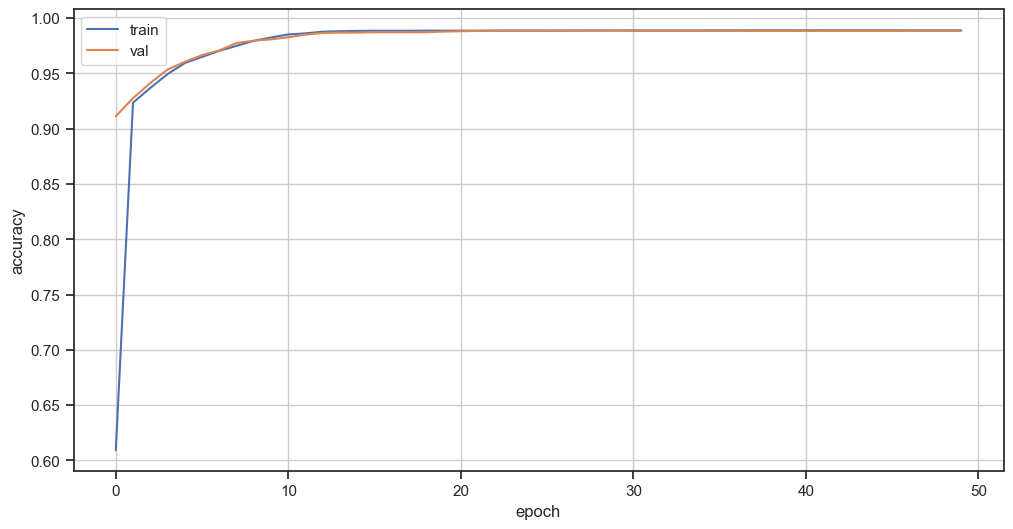

In [19]:
# Plot validation and testing accuracy
plt.figure(figsize=(12,6)) #Tamaño del gráfico.
plt.plot(history.history['accuracy']) #Graficar la precisión (entrenamiento).
plt.plot(history.history['val_accuracy']) #Graficar la precisión de validación.
plt.xlabel('epoch') #Etiqueta eje x.
plt.ylabel('accuracy') #Etiqueta eje y.
plt.legend(['train', 'val']) #Leyenda.
plt.grid(); #Mostrar cuadrícula.

Se aprecia el gráfico de la precisión conforme aumentan las épocas, donde se puede comparar la precisión de entrenamiento y la precisión validación de entrenamiento.

Cerca del 100%.

#### 4j. Visualise the learning curves for analysis purposes (overfitting / underfitting / right fitting)

Graficar la perdida durante el entrenamiento y la validación. (Analizar el rendimiento del modelo)

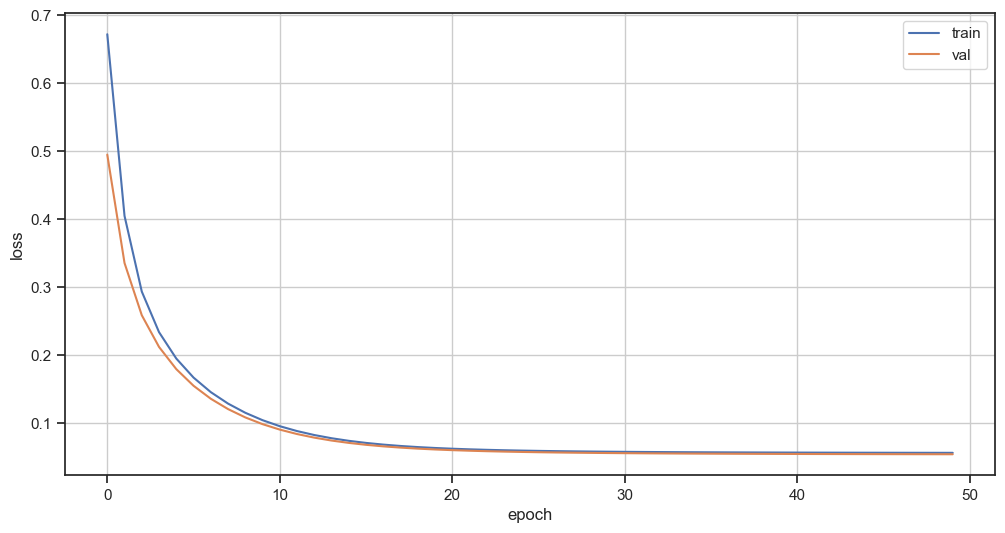

In [20]:
# Plot validation and testing loss
plt.figure(figsize=(12,6)) #Tamaño del gráfico.
plt.plot(history.history['loss']) #Graficar la pérdida.
plt.plot(history.history['val_loss']) #Graficar la pérdida (validación).
plt.xlabel('epoch') #Etiqueta eje x.
plt.ylabel('loss') #Etiqueta eje y.
plt.legend(['train', 'val']) #leyenda.
plt.grid(); #Mostrar cuadrícula.

Se puede apreciar el gráfico donde se ve la perdida de validación como la perdida de entrenamiento a lo largo de las épocas, esto nos da indicios del rendimiento del modelo.

### Pesos del modelo

Mostrar los pesos durante el entrenamiento para la primera capa [0].

In [21]:
# Print weights
weights = model.layers[0].get_weights() #Obtención de los pesos de la primera capa.
print(weights) #Desplegar los pesos.

[array([[-0.5765117 ],
       [ 0.82263404],
       [ 4.5367684 ],
       [ 1.001882  ],
       [-0.40398517]], dtype=float32), array([-4.0007653], dtype=float32)]


Se aprecian los valores de los pesos y el sesgo de la capa de entrada donde el sesgo sería él -4.

#### 4k. Evaluate the accuracy of the learnt model using the testing set

Evaluar nuevamente el modelo para obtener la precisión.

In [22]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) #Evaluar el modelo.
print(f"Test Accuracy: {accuracy:.4f}") #Desplegar la precisión.

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0512
Test Accuracy: 0.9898


Se aprecia la precisión final del modelo.

#### 4l. Apply the learnt model to new data (run the next cell multiple times)

Se selecciona una muestra aleatoria del set de prueba y se hace una predicción.

In [23]:
# Predict on new data
indx = np.random.randint(low=0, high=y_test.shape[0]) #Selección de un índice aleatorio.
xi = np.array([X_test[indx,:]]) #Seleccionar la muestra del set de prueba.
prediction = model.predict(xi) #Hacer la predicción.
print(f"Input: {xi} \t Target: {y_test.iloc[indx]} \t Prediction: {prediction[0][0]:.4f}") #Desplegar la predicción y el valor real.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Input: [[-0.83072967  1.74656528 -0.592501   -0.60146334  1.35777538]] 	 Target: 0.0 	 Prediction: 0.0027


Se aprecian las entradas seleccionadas, así como la variable objetivo y la predicción, donde en este caso prácticamente la variable objetivo y la predicción son las mismas.

### 5. Compute performance metrics

Definimos la importación de la matriz de confusión. Esto nos permite realizar la matriz de confusión lo que nos permite acceder a las métricas pedidas(Accuracy, Precision, Recall, Specificity, F1-score).

In [24]:
from sklearn.metrics import confusion_matrix #Permite el uso de la matriz de confusión.

y_predictions = model.predict(X_test) > 0.5 #Las predicciones se comparan con 0.5 (true:si son mayores a 0.5)
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions) #Creación de matriz de confusión.

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


La celda anterior no genera salida.

#### 5a. Compute confusion matrix

Se grafica la matriz de confusión. Se muestran los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

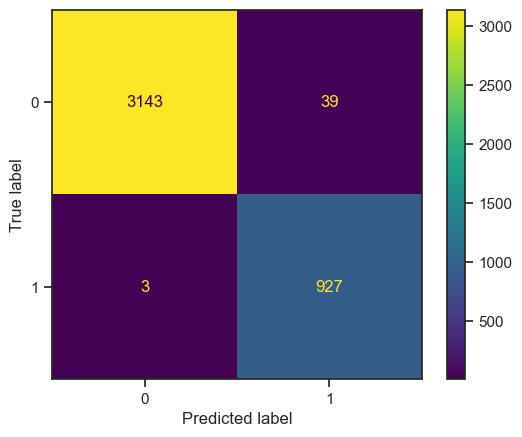

In [25]:
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix) #Se iguala a c_matrix (celda de codigo anterior) para mostrar enseñar la matriz.
display_matrix.plot() #Despliegue da la matriz de confusión.

En el gráfico anterior se muestran los resultados obtenidos donde se puede interpretar como: 
- Verdadero positivo (3143): Valores reales positivos  y la prueba los predijo como positivos.
- Verdadero negativo (927): Valores reales negativos y la prueba los predijo como negativo.
- Falso negativo (3): Valores reales positivos y la prueba los predijo como negativo (Error tipo 2)
- Falso positivo (39): Valores reales negativos y la prueba los predijo como positivo (Error tipo 1)

#### 5b. Compute performance metrics

Se realizan los cálculos para las métricas de desempeño con base en la matriz de confusión, para luego ver los resultados desplegados.

In [26]:
def get_performance_metrics(c_matrix): #Permite el acceso a los datos de la matriz de confusión para obtener las métricas de desempeño.
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1] #Extracción de los valores de la matriz de confusión.

    accuracy = (tp + tn) / (tp + tn + fp + fn) #Cálculo de exactitud.
    precision = tp / (tp + fp) #Cálculo de presición.
    recall = tp / (tp + fn) #Cálculo de sensibilidad.
    specificity = tn / (tn + fp) #Especificidad.
    f1_score = 2 * (precision * recall)/(precision + recall) #Cálculo de F1-score.
    return accuracy, precision, recall, specificity, f1_score #Regresa los valores previamente calculados.

accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix) #Obtener cálculo de las métricas.

print(f"Accuracy: {accuracy:0.6f}") #Desplegar Accuracy.(Exactitud)
print(f"Precision: {precision:0.6f}") #Desplegar Presicion.
print(f"Recall: {recall:0.6f}") #Desplegar Recall. (Sensibilidad)
print(f"Specificity: {specificity:0.6f}")  #Desplegar Specificity. (Especificidad)
print(f"F1-score: {f1_score:0.6f}") #Desplegar F1-Score. ()

Accuracy: 0.989786
Precision: 0.959627
Recall: 0.996774
Specificity: 0.987744
F1-score: 0.977848



El modelo tiene una exactitud muy cercana al "1" lo que es un claro indicador de que el modelo tiene una precisión muy cercana al 100% lo que para un modelo de clasificación significa que las predicciones son correctas en casi (en este caso) en un 100% o (98.9786%).


La precisión (95.9627%) del modelo de igual manera, es alto, lo que nos indica que es un claro indicador referente a las predicciones que realizo el modelo para una afirmación positiva son casi en 96% correctas.



La sensibilidad (99.6774%) al igual que las demás métricas presenta un porcentaje alto, indicándonos un modelo excelentemente balanceado. (omite pocos falsos negativos).



La especificidad (98.7744%) en este caso nos indica que no hay presencia errores respecto ala identificación de casos positivos cuando deben de ser negativos, en pocas palabras, detecta con alto porcentaje los casos negativos.



El F1-score con un porcentaje de 97.7848% indica que la sensibilidad y la precisión están en balance.


### **C. Model selection and discussions**

| **Métrica**   | **From Scratch** | **Tensorflow** |
|---------------|------------------|----------------|
| Accuracy      | 0.989300          | 0.989786       |
| Precision     | 0.957645          | 0.959627       |
| Recall        | 0.996774          | 0.996774       |
| Specificity   | 0.987115          | 0.987744       |
| F1-score      | 0.976818          | 0.977848       |

En la tabla anterior se puede ver la comparación de las métricas de ambos modelos, sin tensorflow y con tensorflow.


Una de las primeras observaciones es que el uso de tensorflow, sin duda alguna, mejoró el rendimiento del modelo en términos generales, teniendo como comparación el modelo sin tensorflow, aunque cabe recalcar que las métricas del modelo sin tensorflow a comparación del modelo con tensorflow son prácticamente iguales, la diferencia en las métricas de dichos modelos es mínima.


Si tenemos que decidir cuál de esos es mejor, en término de las métricas, yo daría que el de tensorflow, ya que estas tienen mejores índices de desempeño (siendo algo mínimo).


Las razones de esta mejoría pueden ser los diferentes beneficios que trae consigo el uso de tensorflow como:

- Optimización y eficiencia: Mejora de precisión y la eficiencia del modelo.

- Algoritmos avanzados: Regularización, Optimización, ajuste de hiperparámetros.

- Escalabilidad: manejo de grandes volúmenes de datos.


No obstante, si tuviera que decidir sobre si usar uno u otro, me decidirá por el que no usa tensorflow. Esto porque, en este caso, las métricas son prácticamente iguales, entonces el uso de tenworflow requeriría mayor poder computacional.

### **Conclusión**

Esta tarea al igual que la anterior fue enriquecedora en el sentido de que se repasaron las líneas y los comandos que se revisaron en el archivo anterior, donde se repasaron las funciones y el significado de cada celda de código, donde como complicación fueron las nuevas celdas de código añadidas por el uso de tensorflow, donde se me hizo muy interesante el uso de los gráficos, ya que era la primera vez que vía gráficos similares donde ayudan a poder visualizar la relación que hay entre el Dataset.

Sin duda alguna fue una tarea minuciosa la cual me ayudo a sentirme más seguro referente a los temas de aplicación de algoritmos en temas de clasificación usando tensorflow así como desarrollándolo desde 0.

### **Referencias**

**Mismas que el archivo "sigmoid-perceptron-from-scratch"**

An introduction to seaborn — seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/tutorial/introduction.html

Cuerva, L. L. (2024, July 18). Introducción a TensorFlow y Keras: Fundamentos y ejemplos. OpenWebinars.net. https://openwebinars.net/blog/tensorflow-keras-fundamentos/

Itop. (n.d.). Tensorflow. https://www.itop.es/soluciones-tecnologicas/business-analytics-business-intelligence/tensorflow.html

### **Anexos**

- Accuracy (exactitud): Cercanía del resultado de una medición al valor verdadero (relacionada con el sesgo).

- Precisión: Dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud.
    - Cuando menor es la dispersión mayor la precisión.

- Recall (Sensibilidad): Indica la capacidad del estimador para discriminar los casos positivos, de los negativos.
    - Proporción de casos positivos que fueron correctamente identificados.

- Specificity (Especificidad): Indica la capacidad del estimador para discriminar los casos positivos, de los negativos.
    - Casos negativos que se han clasificado correctamente.
    
- F1-Score: Resumen de precisión y sensibilidad en una sola métrica.

Segun (Arce, 2024): 4 casos
- **Alta precisión y alto recall**: el modelo de Machine Learning escogido maneja perfectamente esa clase.

- **Alta precisión y bajo recall**: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

- **Baja precisión y alto recall**: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

- **Baja precisión y bajo recall**: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.